Langkah 1 - Import Library

In [6]:
#Mengimpor library yg dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

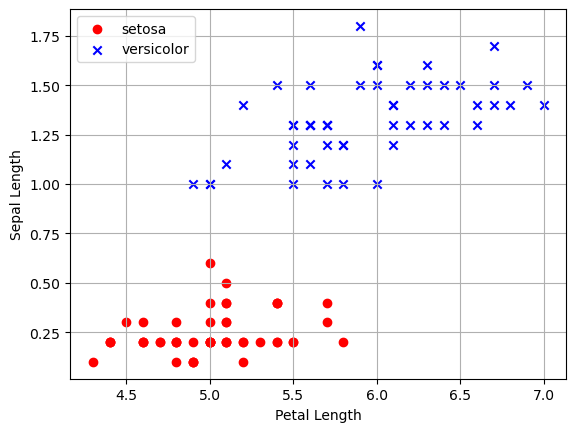

In [13]:
df = pd.read_csv('Iris.csv', header=None) # membaca data dari file CSV dengan nama 'Iris.csv' dan menyimpannya dalam sebuah DataFrame (df) menggunakan Pandas. 

# Memisahkan data untuk setiap jenis bunga Iris (setosa, versicolor, virginica) berdasarkan kolom keempat (indeks 3) dari DataFrame 'df'.
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Inisialisasi variabel 'a' dan 'b' untuk digunakan sebagai indeks kolom pada scatter plot.
a, b = 0, 3

# Membuat scatter plot untuk data 'setosa' dengan sumbu x dan y yang telah dipilih, warna merah, marker lingkaran, dan label 'setosa'.
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
# Membuat scatter plot untuk data 'versicolor' dengan sumbu x dan y yang telah dipilih, warna biru, marker 'x', dan label 'versicolor'.
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Menambahkan label pada sumbu x dengan teks 'Petal Length'.
plt.xlabel('Petal Length')
# Menambahkan label pada sumbu y dengan teks 'Sepal Length'.
plt.ylabel('Sepal Length')
# Menambahkan legenda ke plot dengan posisi 'upper left' yang menunjukkan label 'setosa' dan 'versicolor'.
plt.legend(loc='upper left')
# Menambahkan grid ke plot untuk membantu membaca data dengan lebih baik.
plt.grid()
# Menampilkan plot ke layar.
plt.show()

Langkah 3 - Membuat Kelas Perceptron

In [8]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        # Konstruktor kelas Perceptron untuk menginisialisasi parameter learning rate (eta) dan jumlah iterasi (n_iter).
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # Metode 'fit' digunakan untuk melatih model Perceptron.
        
        # Inisialisasi vektor bobot (w_) dengan nilai nol dan list untuk menyimpan jumlah kesalahan pada setiap iterasi (errors_).
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            # Loop untuk iterasi sebanyak 'n_iter' kali.
            errors = 0
            for xi, target in zip(X, y):
                 # Loop melalui data latih (X) dan label target (y).
                 
                 # Menghitung perbedaan antara target aktual dan hasil prediksi model Perceptron.
                update = self.eta * (target - self.predict(xi))
                
                # Memperbarui bias (w_[0]) model.
                self.w_[0] += update
                
                # Memperbarui bobot lainnya (w_[1:]) model.
                self.w_[1:] += update * xi
                
                # Menambahkan 1 pada jumlah kesalahan jika 'update' tidak sama dengan nol.
                errors += int(update != 0.0)
            # Menambahkan jumlah kesalahan pada iterasi saat ini ke dalam list 'errors_'.    
        
            self.errors_.append(errors)
         # Mengembalikan objek Perceptron yang telah dilatih.    
        return self
    
    def net_input(self, X):
        # Metode untuk menghitung nilai masukan (net input) ke model Perceptron.
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
         # Metode 'predict' digunakan untuk melakukan prediksi berdasarkan nilai masukan (net input) model Perceptron.
        
        # Menggunakan np.where untuk menghasilkan kelas prediksi: 1 jika net input >= 0.0, -1 jika net input < 0.0.
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Langkah 4 - Pilih Data dan Encoding Label

In [9]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

Langkah 5 - Fitting Model

In [10]:
# Membuat objek Perceptron dengan learning rate (eta) sebesar 0.1 dan jumlah iterasi sebanyak 10.
ppn = Perceptron(eta=0.1, n_iter=10)

# Melatih model Perceptron (ppn) dengan data latih (X) dan label kelas target (y).
ppn.fit(X, y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

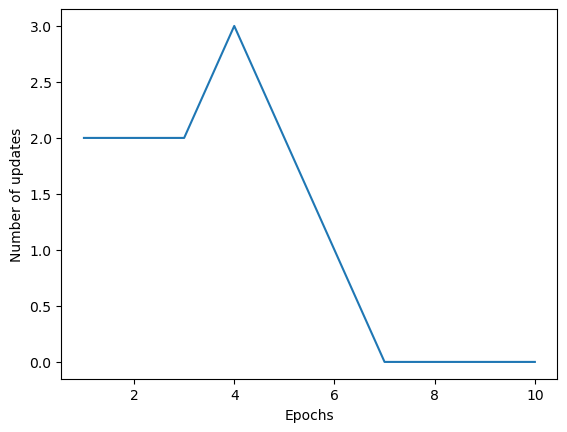

In [11]:
# Membuat plot dari jumlah kesalahan (updates) pada setiap epoch (iterasi) selama pelatihan model Perceptron.
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)

# Menambahkan label pada sumbu x dengan teks 'Epochs'.
plt.xlabel('Epochs')
# Menambahkan label pada sumbu y dengan teks 'Number of updates'.
plt.ylabel('Number of updates')
# Menampilkan plot yang menunjukkan perubahan jumlah kesalahan pada setiap iterasi.
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

In [12]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
                # Plot titik-titik data berdasarkan kelas dengan simbol marker dan warna yang sesuai.
                plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)